In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

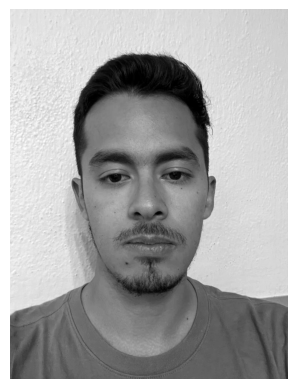

In [19]:
img = cv2.imread('images/my-photo.jpg', cv2.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(img, cmap="gray")

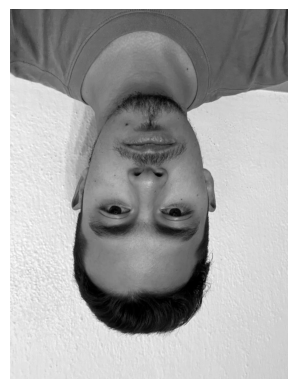

In [22]:
img_flip = img.copy()
n, m = img_flip.shape
for i in range(n):
    img_flip[i] = img[n-i-1]
plt.axis('off')
plt.imshow(img_flip, cmap="gray")

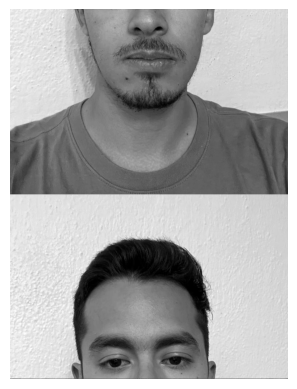

In [29]:
img_flip = img.copy()
n, m = img_flip.shape
idx = int(n/2)
for i in range(n):
    img_flip[idx] = img[i]
    idx = (idx+1)%(n-1)
plt.axis('off')
plt.imshow(img_flip, cmap="gray")

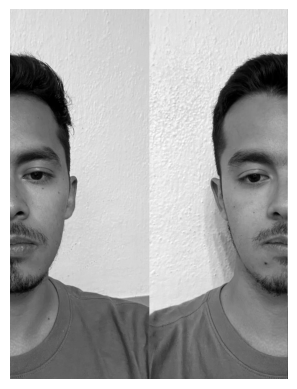

In [53]:
img_flip = img.copy()
n, m = img_flip.shape
for i in range(n):
    idx = int(m/2)
    for j in range(m):
        img_flip[i][idx] = img[i][j]
        idx = (idx+1)%(m-1)
plt.axis('off')
plt.imshow(img_flip, cmap="gray")

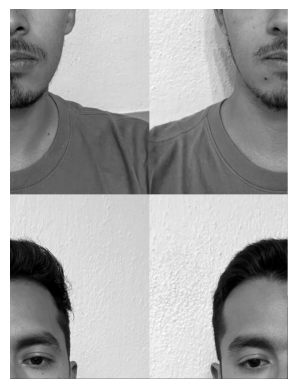

In [56]:
img_flip = img.copy()
n, m = img_flip.shape
idxi = int(n/2)
for i in range(n):
    idxj = int(m/2)
    for j in range(m):
        img_flip[idxi][idxj] = img[i][j]
        idxj = (idxj+1)%(m-1)
    idxi = (idxi+1)%(n-1)
plt.axis('off')
plt.imshow(img_flip, cmap="gray")

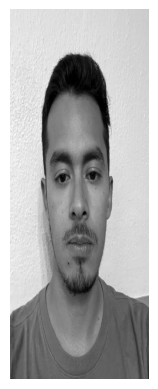

In [64]:
n, m = img.shape
img_flip = np.zeros(shape=(n,int(m/2)))
for i in range(n):
    for j in range(int(m/2)):
        img_flip[i][j] = img[i][j*2]
plt.axis('off')
plt.imshow(img_flip, cmap="gray")

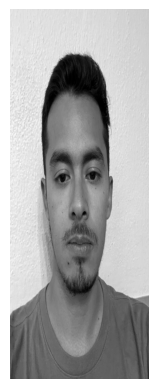

In [67]:
n, m = img.shape
img_flip = np.zeros(shape=(n,int(m/2)))
for i in range(n):
    for j in range(int(m/2)):
        img_flip[i][j] = (img[i][j*2].astype(int)+img[i][j*2+1].astype(int))/2
plt.axis('off')
plt.imshow(img_flip, cmap="gray")

(1024, 768)
1024 768


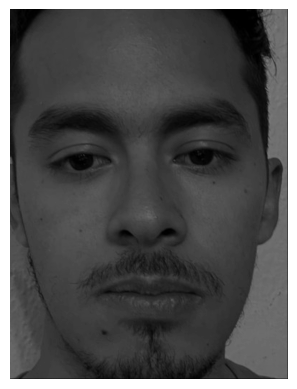

In [144]:
n, m = img.shape
img_zoom = np.zeros(shape=(n,m))
# idxi, idxj = int(n/4), int(m/4)
# img_zoom = img[idxi:idxi*3, idxj:idxj*3].copy()
img_zoom[::2, ::2] = img[idxi:idxi*3, idxj:idxj*3].copy()
img_zoom[1:n-1:2, 1:m-1:2] = (img_zoom[:n-2:2, :m-2:2].astype(int) + img_zoom[2::2, 2::2].astype(int))/2
plt.axis('off')
plt.imshow(img_zoom, cmap="gray")

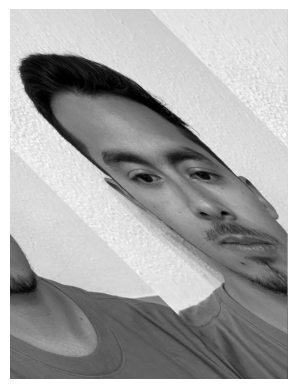

In [75]:
img_mirror = img.copy()
n, m = img_mirror.shape
idx = int(m/2)
for j in range(n):
    for i in range(m):
        img_mirror[j][idx] = img[j][i]
        idx = (idx+1)%(m-1)
plt.axis('off')
plt.imshow(img_mirror, cmap="gray")

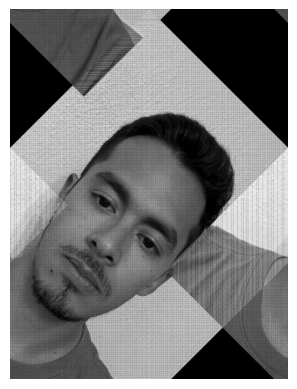

In [184]:
img_rotate = np.zeros(shape=(n,m))

theta = np.radians(45)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

coords = np.array([int(n/2),int(m/2)])
tcoords = coords @ R
tx, ty = coords.astype(int)

for i in range(n):
    for j in range(m):
        coords = np.array([i,j])
        coords = coords @ R
        x, y = coords.astype(int)
        x = (x+tx*2)%n
        y = (y+ty)%m
        img_rotate[x][y] = img[i][j]

plt.axis('off')
plt.imshow(img_rotate, cmap="gray")